## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_df = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = mice_df[mice_df[["Mouse ID", "Timepoint"]].duplicated()]
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dupe = mice_df[mice_df["Mouse ID"] == "g989"]
dupe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# create new df with previous df and use .drop to clean list (also don't forgot .nunique ex line 7)
# possible to use .index
dupe_index = mice_df[mice_df['Mouse ID'] == 'g989'].index
cleaned_mice_df = mice_df.drop(dupe_index)
dupe_index
cleaned_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# grouped_usa_df = usa_ufo_df.groupby(['state'])
grouped_regimen = cleaned_mice_df.groupby(['Drug Regimen'])
# Assemble the resulting series into a single summary dataframe.
# grouped_regimen.count().head(20)
mean = grouped_regimen['Tumor Volume (mm3)'].mean()
median = grouped_regimen['Tumor Volume (mm3)'].median()
var = grouped_regimen['Tumor Volume (mm3)'].var()
std = grouped_regimen['Tumor Volume (mm3)'].std()
sems = grouped_regimen['Tumor Volume (mm3)'].sem()
# count = grouped_regimen['Tumor Voume (mm3)'].count()
grouped_regimen.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var, "Std Deviation": std, "SEM": summary_df.sem(axis = 1, skipna = False)})

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var, "Std Deviation": std, "SEM": sems})

# summary_df.sem(axis = 1, skipna = False) this gives different result than using .agg method??
summary_df

# Using the aggregation method, produce the same summary statistics in a single line
# use .agg
# cleaned_mice_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# use .agg
cleaned_mice_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
new_summary_df = summary_df.reset_index()
summary_df

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

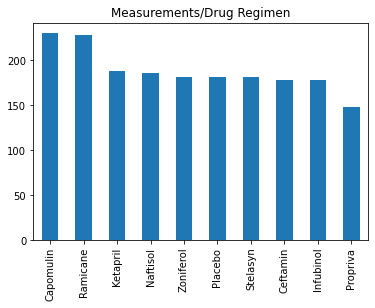

In [11]:
# this is what should be ploted
count = cleaned_mice_df['Drug Regimen'].value_counts()

count.plot(kind='bar', title='Measurements/Drug Regimen')

count

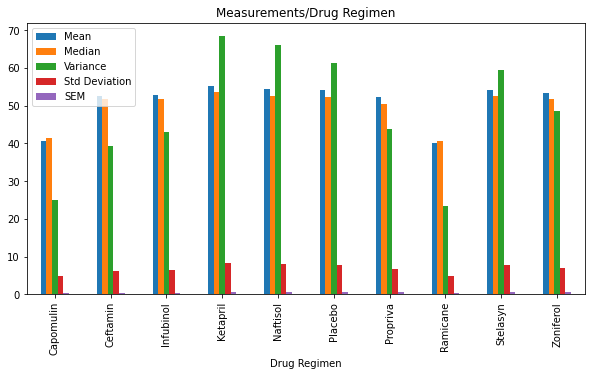

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# count = grouped_regimen['Tumor Voume (mm3)'].value_counts()

ax = summary_df[['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM']].plot(kind='bar', 
                                                                             title='Measurements/Drug Regimen',
                                                                            figsize=(10,5))

<Figure size 720x216 with 0 Axes>

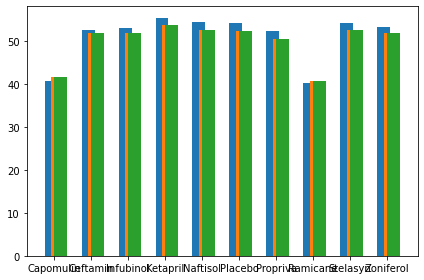

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen = list(new_summary_df['Drug Regimen'])
mean = list(summary_df['Mean'])
med = list(summary_df['Median'])
var = list(summary_df['Variance'])
stdev = list(summary_df['Std Deviation'])
sem = list(summary_df['SEM'])


x = np.arange(len(regimen)) # label locations
width =0.35 #width of bars
tick_locations = [value for value in x]
plt.figure(figsize=(10,3))
# plt.bar(x_axis, mean, med, var, color='r', alpha=0.5, align="center")
fig, ax = plt.subplots()
rect1 = ax.bar(x - width/4, mean, width, label='Mean')
rect2 = ax.bar(x + width/4, med, width, label='Median')
rect3 = ax.bar(x + (2*width/4), med, width, label='Variance')

# plt.bar(x_axis, med, color='b', alpha=0.5, align="center")

# plt.bar(new_summary_df["Drug Regimen"], new_summary_df[['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM']])

plt.xticks(tick_locations, list(summary_df.index))

fig.tight_layout()
    
plt.show()


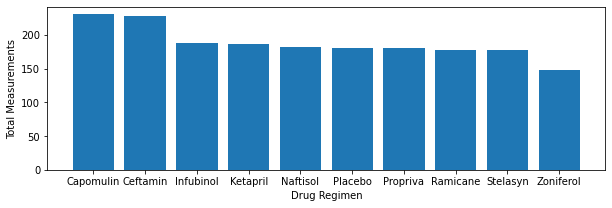

In [14]:
count = cleaned_mice_df['Drug Regimen'].value_counts()
x = np.arange(len(count))
width =0.35 #width of bars
tick_locations = [value for value in x]
plt.figure(figsize=(10,3))
plt.xticks(tick_locations, list(summary_df.index))
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")
plt.bar(x, count)

plt.show()

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df =cleaned_mice_df.groupby(['Sex','Mouse ID'])
sex_df['Mouse ID'].nunique()

df = pd.DataFrame(sex_df["Mouse ID"].nunique())
# df[df['Sex'] == 'Male'].sum()
df
# cleaned_mice_df.groupby["Mouse ID"][cleaned_mice_df['Sex'] == 'Female'].count()
# grouped_by_ID = cleaned_mice_df.groupby(['Drug Regimen'])
# male_df =cleaned_mice_df.groupby(cleaned_mice_df['Mouse ID'] == "Male")


Mouse ID
Sex    Mouse ID          
Female a203             1
       a251             1
       a262             1
       a275             1
       a366             1
...                   ...
Male   y449             1
       y793             1
       y865             1
       z578             1
       z969             1

[248 rows x 1 columns]

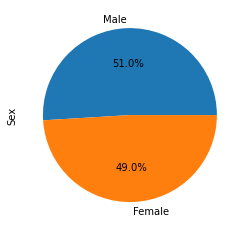

In [16]:
count = cleaned_mice_df['Sex'].value_counts()
count.plot(kind="pie", autopct="%1.1f%%")
plt.show()

In [40]:
list(cleaned_mice_df['Sex'].unique())

['Male', 'Female']

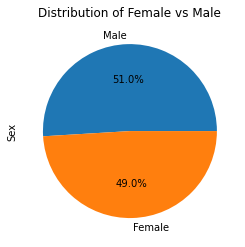

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

count = cleaned_mice_df['Sex'].value_counts()
# labels = b
plt.pie(count, labels=list(cleaned_mice_df['Sex'].unique()), autopct="%1.1f%%")
plt.title('Distribution of Female vs Male')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [127]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
regimen_df = cleaned_mice_df.loc[cleaned_mice_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])]
tumor_max = regimen_df.groupby(['Mouse ID'])['Timepoint'].max()
tumor_max = tumor_max.reset_index()
tumor_max

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = tumor_max.merge(cleaned_mice_df, on=['Mouse ID', 'Timepoint'])
merge_df.head()
regimen_df['Drug Regimen'].value_counts()
merge_df['Drug Regimen'].value_counts()


9     38.982878
12    38.939633
24    30.485985
25    37.074024
26    40.159220
32    47.685963
33    37.311846
34    38.125164
35    38.753265
45    41.483008
49    38.846876
51    28.430964
53    33.329098
64    46.539206
65    32.377357
68    41.581521
70    23.343598
72    40.728578
73    34.455298
78    31.023923
82    40.658124
83    39.952347
88    36.041047
90    28.484033
96    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [48]:
regimen_tumor_df = merge_df[['Drug Regimen','Tumor Volume (mm3)']]
regimen_tumor_df = regimen_tumor_df.to_numpy().tolist()
regimen_tumor_df # can call elem from list as df[index of list][index within list] ex regimen_tumor_df[2][1]
regimen_tumor_df

[['Infubinol', 67.97341878],
 ['Infubinol', 65.52574285],
 ['Ceftamin', 62.99935619],
 ['Ramicane', 38.407618299999996],
 ['Ramicane', 43.04754260000001],
 ['Ramicane', 38.81036633],
 ['Infubinol', 57.03186187],
 ['Ramicane', 32.97852192],
 ['Infubinol', 66.08306589],
 ['Capomulin', 38.98287774],
 ['Ceftamin', 45.0],
 ['Ceftamin', 56.05774909],
 ['Capomulin', 38.93963263],
 ['Ceftamin', 55.74282869],
 ['Infubinol', 72.2267309],
 ['Infubinol', 36.321345799999996],
 ['Ramicane', 38.34200823],
 ['Ramicane', 33.39765251],
 ['Infubinol', 60.96971133],
 ['Ramicane', 37.31123552],
 ['Infubinol', 62.43540402],
 ['Ramicane', 40.65900627],
 ['Infubinol', 60.91876652],
 ['Ceftamin', 48.72207785],
 ['Capomulin', 30.48598484],
 ['Capomulin', 37.07402422],
 ['Capomulin', 40.1592203],
 ['Ramicane', 29.12847181],
 ['Ceftamin', 47.784681799999994],
 ['Ramicane', 33.56240217],
 ['Ramicane', 36.37451039],
 ['Infubinol', 67.28962147],
 ['Capomulin', 47.68596303],
 ['Capomulin', 37.31184577],
 ['Capomulin'

The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
The the median of tumor volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


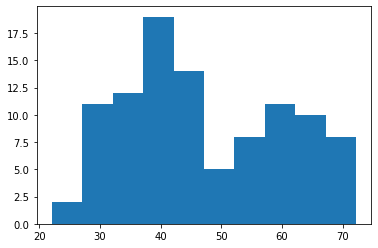

In [69]:
# Put treatments into a list for for loop (and later for plot labels)
# regimen
druglist = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
res = list(zip(*regimen_tumor_df))
drug = res[0]
tumor = res[1]
# Create empty list to fill with tumor vol data (for plotting)
capolist = []
ramilist = []
infulist = []
ceftlist = []
 

for index, drug in enumerate(drug):
    if drug == druglist[0]:
        capolist.append(tumor[index])
    elif drug == druglist[1]:
        ramilist.append(tumor[index])
    elif drug == druglist[2]:
        infulist.append(tumor[index]) 
    elif drug == druglist[3]:
        ceftlist.append(tumor[index])    
    
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# ***quantile only works on df or series*** got to orig df to get quartiles as well as for the rows with mice

quartile = merge_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartile[0.25]
upperq = quartile[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartile[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# print(capolist)
# print(ramilist)
# print(infulist)
# print(ceftlist)
plt.hist(merge_df['Tumor Volume (mm3)'])
plt.show()


# fig1, ax1 = plt.subplots()
# ax1.set_title('Tumor Volume (mm3)')
# ax1.set_ylabel('Volume')
# ax1.boxplot(cleaned_mice_df['Tumor Volume (mm3)'])
# plt.show()

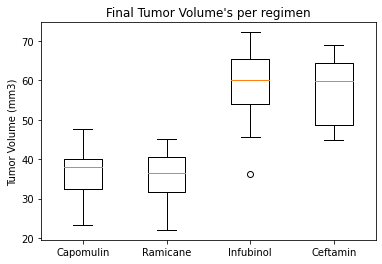

In [82]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [capolist,ramilist,infulist,ceftlist]
fig, ax = plt.subplots()
ax.set_xticklabels(list(druglist))
ax.set_title("Final Tumor Volume's per regimen")
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(data)
plt.show()

## Line and Scatter Plots

/Users/Howard/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


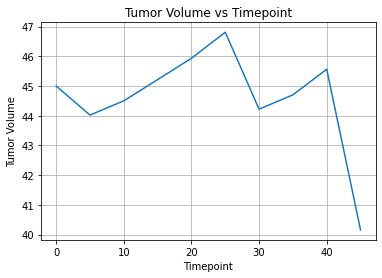

In [157]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
g316_df = regimen_df[regimen_df['Drug Regimen'] == 'Capomulin'][regimen_df['Mouse ID'] == 'g316']
time = g316_df['Timepoint']
vol = g316_df['Tumor Volume (mm3)']
plt.plot(time, vol)
plt.title('Tumor Volume vs Timepoint')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.grid()
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Matplotlib - Day 3 - Activity 3

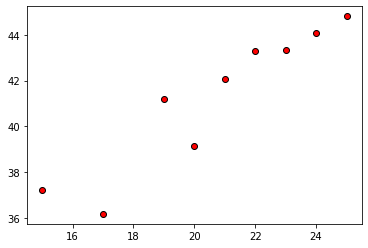

In [188]:
capomulin = regimen_df[regimen_df['Drug Regimen'] == 'Capomulin']
# regimen_df[regimen_df['Drug Regimen'].str.contains('Capomulin')]
tum_vol = capomulin.groupby(['Weight (g)'])['Tumor Volume (mm3)'].mean()
weight = capomulin['Weight (g)'].unique()
plt.scatter(weight, tum_vol, marker="o", facecolors="red", edgecolors="black")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#for each mouse in the study get avg tumor value grouped by each mouse to get avg tumor value per drug
